<I><h1>The Fourth Homework of Artificial Neural Network</h1></I>
<I><h2>Name: Ata Shaker</h2></I>
<I><h2>Std No.: 040200925</h2></I>

<B><h2>The First Question</h2></B>

In [1]:
# Importing the functions and libraries that we will use
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading train data
census_train_data = pd.read_excel('census-train.xlsx', header = 1)
X_train = census_train_data[census_train_data.columns[:-1]]
y_train = census_train_data['label']
# Reading test data
census_test_data = pd.read_excel('census-test.xlsx', header = 1)
X_test = census_test_data[census_test_data.columns[:-1]]
y_test = census_test_data['label']

In [3]:
# Function that categorizes the entries into integers
def data_categorizor(df):
    for col in df.columns:
        if type(df.loc[0, col]) != np.int64:
            keys = df[col].unique()
            replace_dict = dict(zip(keys, np.arange(keys.shape[0]))) 
            df[col].replace(replace_dict, inplace=True)

In [4]:
# Categorizing the data
data_categorizor(X_train)
data_categorizor(X_test)
y_train.replace({'<=50K': 0, '>50K': 1}, inplace=True)
y_test.replace({'<=50K.': 0, '>50K.': 1}, inplace=True)

Text(0, 0.5, 'True Positive Rate')

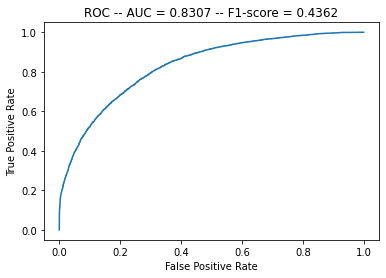

In [5]:
# Creating a classifier and calculating the asked parameters using various functions
census_classifier = LogisticRegression(solver="newton-cg",C=50)
census_classifier.fit(X_train, y_train)
Z_census_classifier = census_classifier.predict(X_test)
Z_census_classifier_prediction = census_classifier.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate = metrics.roc_curve(y_test, Z_census_classifier_prediction)[0:2]
AUC = metrics.roc_auc_score(y_test, Z_census_classifier_prediction)
census_F1_score = metrics.f1_score(y_test, Z_census_classifier)
# Plotting the graph
plt.plot(false_positive_rate, true_positive_rate)
plt.title(f'ROC -- AUC = {np.round(AUC, 4)} -- F1-score = {np.round(census_F1_score, 4)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<B><h2>The Second Question</h2></B>

Text(0.5, 1.0, 'SVM_RBF')

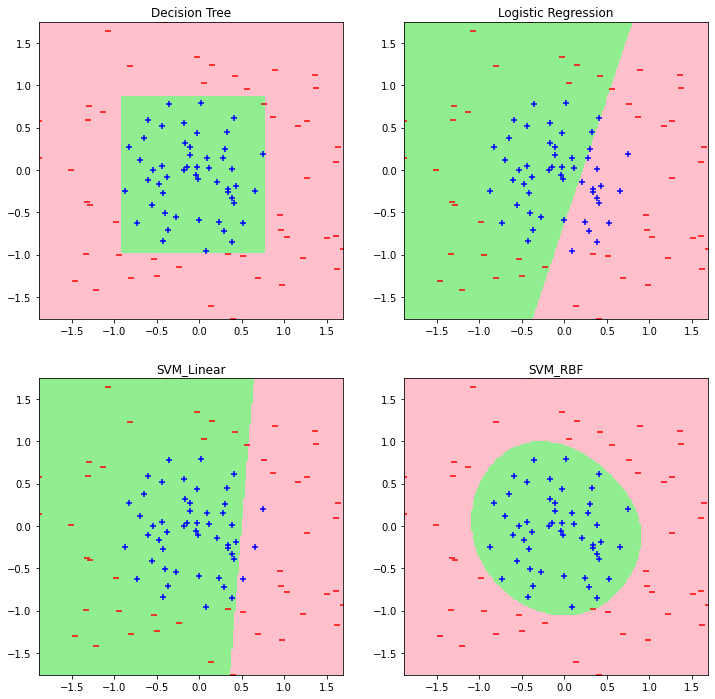

In [6]:
# Reading the data and decalring necessary values for classifying 
x_y_data = pd.read_excel('X1X2Y.xlsx', header=1)
X = np.array(x_y_data[['x1', 'x2']], dtype=float)
y = np.array(x_y_data['y'], dtype=float)
x1_lin = np.linspace(x_y_data['x1'].min(), x_y_data['x1'].max(), 200)
x2_lin = np.linspace(x_y_data['x2'].min(), x_y_data['x2'].max(), 200)
x1_grid, x2_grid = np.meshgrid(x1_lin, x2_lin) # Creating Meshgrid
pos = x_y_data[x_y_data['y'] == 1]
neg = x_y_data[x_y_data['y'] == 0]
plt.figure(figsize=(12, 12))

# The part for Decision Tree Classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X, y)
Z_tree = tree_classifier.predict(np.array([x1_grid.ravel(), x2_grid.ravel()]).T)
Z_tree = Z_tree.reshape(x1_grid.shape)
plt.subplot(2, 2, 1)
plt.contourf(x1_grid, x2_grid, Z_tree, cmap=ListedColormap(['pink', 'lightgreen']))
plt.scatter(x=pos['x1'], y=pos['x2'], marker='+', c='#0000ff')
plt.scatter(x=neg['x1'], y=neg['x2'], marker='_', c='#ff0000')
plt.title('Decision Tree')

# The Part for Logistic Classifier
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X, y)
Z_logistic = logistic_classifier.predict(np.array([x1_grid.ravel(), x2_grid.ravel()]).T)
Z_logistic = Z_logistic.reshape(x1_grid.shape)
plt.subplot(2, 2, 2)
plt.contourf(x1_grid, x2_grid, Z_logistic, cmap=ListedColormap(['pink', 'lightgreen']))
plt.scatter(x=pos['x1'], y=pos['x2'], marker='+', c='#0000ff')
plt.scatter(x=neg['x1'], y=neg['x2'], marker='_', c='#ff0000')
plt.title('Logistic Regression')

# The Part for Linear SVM
SVM_linear_classifier = SVC(kernel='linear')
SVM_linear_classifier.fit(X, y)
Z_SVM_linear = SVM_linear_classifier.predict(np.array([x1_grid.ravel(), x2_grid.ravel()]).T)
Z_SVM_linear = Z_SVM_linear.reshape(x1_grid.shape)
plt.subplot(2, 2, 3)
plt.contourf(x1_grid, x2_grid, Z_SVM_linear, cmap=ListedColormap(['pink', 'lightgreen']))
plt.scatter(x=pos['x1'], y=pos['x2'], marker='+', c='#0000ff')
plt.scatter(x=neg['x1'], y=neg['x2'], marker='_', c='#ff0000')
plt.title('SVM_Linear')

# The Part for RBF SVM
SVM_RBF_classifier = SVC(kernel='rbf')
SVM_RBF_classifier.fit(X, y)
Z_SVM_RBF = SVM_RBF_classifier.predict(np.array([x1_grid.ravel(), x2_grid.ravel()]).T)
Z_SVM_RBF = Z_SVM_RBF.reshape(x1_grid.shape)
plt.subplot(2, 2, 4)
plt.contourf(x1_grid, x2_grid, Z_SVM_RBF, cmap=ListedColormap(['pink', 'lightgreen']))
plt.scatter(x=pos['x1'], y=pos['x2'], marker='+', c='#0000ff')
plt.scatter(x=neg['x1'], y=neg['x2'], marker='_', c='#ff0000')
plt.title('SVM_RBF')

<B><h2>The Third Question</h2></B>

In [7]:
# A function for Preprocessing the data
def coordinate_extractor(row):
    row_splitted = row.split()
    return pd.Series([float(row_splitted[0]), float(row_splitted[1])], index = ['x1', 'x2'])

In [8]:
# Reading the data and cleaning it
cat_data = pd.read_excel('Cat.xlsx')
cat_head = cat_data.iloc[14:304, 0]
cat_right_ear = cat_data.iloc[316:416,0]
cat_left_ear = cat_data.iloc[428:,0]
cat_head_df = cat_head.apply(lambda row: coordinate_extractor(row))
cat_left_ear_df = cat_left_ear.apply(lambda row: coordinate_extractor(row))
cat_right_ear_df = cat_right_ear.apply(lambda row: coordinate_extractor(row))
cat_df = pd.concat([cat_head_df, cat_left_ear_df, cat_right_ear_df], ignore_index = True)

Text(0, 0.5, 'Dimension 2')

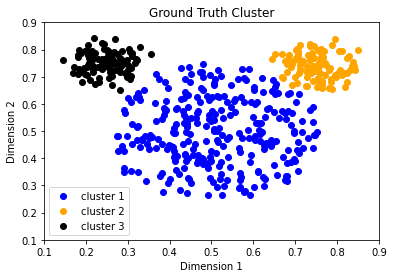

In [9]:
# Plotting the figure
plt.scatter(cat_head_df['x1'], cat_head_df['x2'], c='blue')
plt.scatter(cat_left_ear_df['x1'], cat_left_ear_df['x2'], c='orange')
plt.scatter(cat_right_ear_df['x1'], cat_right_ear_df['x2'], c='black')
plt.xlim([0.1, 0.9])
plt.ylim([0.1, 0.9])
plt.legend(loc='lower left', labels=['cluster 1', 'cluster 2', 'cluster 3'])
plt.title('Ground Truth Cluster')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


Text(0, 0.5, 'Dimension 2')

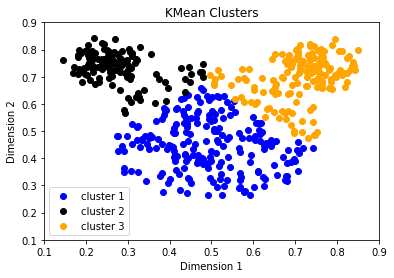

In [10]:
# Classifying the data using KMeans Clusters and Plotting it 
k_means_classifier = KMeans(n_clusters=3, init='random', random_state=42)
k_means_classifier.fit(cat_df[['x1', 'x2']])
Z_k_means = k_means_classifier.predict(cat_df[['x1', 'x2']])
cat_df['class'] = Z_k_means
cat_head_classified = cat_df[cat_df['class'] == 1]
cat_left_ear_classified = cat_df[cat_df['class'] == 2]
cat_right_ear_classified = cat_df[cat_df['class'] == 0]
plt.scatter(cat_head_classified['x1'], cat_head_classified['x2'], c='blue')
plt.scatter(cat_left_ear_classified['x1'], cat_left_ear_classified['x2'], c='black')
plt.scatter(cat_right_ear_classified['x1'], cat_right_ear_classified['x2'], c='orange')
plt.xlim([0.1, 0.9])
plt.ylim([0.1, 0.9])
plt.legend(loc='lower left', labels=['cluster 1', 'cluster 2', 'cluster 3'])
plt.title('KMean Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


<B><h2>The Fourth Question</h2></B>

In [11]:
# Reading and cleaning the data
ship_data = pd.read_excel('Ship.xlsx', header=1, index_col= 'PassengerId' )
ship_data.drop(['Name', 'Ticket'], axis = 1, inplace=True)
X_train_ship = ship_data[ship_data.columns[1:-1]]
y_train_ship = ship_data['Survived']
for col in X_train_ship.columns:
    if type(X_train_ship.loc[1, col]) != np.int64:
        keys = X_train_ship[col].unique()
        replace_dict = dict(zip(keys, np.arange(keys.shape[0]))) 
        X_train_ship[col].replace(replace_dict, inplace=True)

In [13]:
# Measuring the efficiency of each classifier type by using a 10-Fold Cross Validation
cv = KFold(n_splits=10)
ship_classifiers = {'Logistic Regression':LogisticRegression(),'Decision Tree':DecisionTreeClassifier(),
                    'SVM - RBF':SVC(kernel='rbf'), 'SVM - Linear':SVC(kernel='linear'), 
                    'Neural Network':MLPClassifier(hidden_layer_sizes=(10,10,10,10), max_iter=1000)}
for key, val in ship_classifiers.items(): 
    scores = cross_val_score(val, X_train_ship, y_train_ship, cv=cv)
    print(f'''{key} has the mean {np.round(np.mean(scores), 3)}, the deviation {np.round(np.std(scores),3)}, and the range [{np.round(np.min(scores),3)}-{np.round(np.max(scores),3)}]''')

Logistic Regression has the mean 0.792, the deviation 0.031, and the range [0.742-0.831]
Decision Tree has the mean 0.758, the deviation 0.045, and the range [0.697-0.831]
SVM - RBF has the mean 0.675, the deviation 0.058, and the range [0.567-0.753]
SVM - Linear has the mean 0.787, the deviation 0.039, and the range [0.73-0.843]
Neural Network has the mean 0.655, the deviation 0.072, and the range [0.528-0.764]
